In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
anime_df = pd.read_csv('./animes.csv')
anime_df.head()

,mal_id,title,synopsis,background,aired,airing,duration,episodes,type,favorites,...,score,scored_by,rating,premiered,genres,related,status,licensors,producers,studios
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",-,"Apr 3, 1998 to Apr 24, 1999",0,24 min per ep,26,TV,59968,...,8.77,661519,R - 17+ (violence & profanity),Spring 1998,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Finished Airing,"Funimation, Bandai Entertainment",Bandai Visual,Sunrise
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",-,"Sep 1, 2001",0,1 hr 55 min,1,Movie,1063,...,8.39,168515,R - 17+ (violence & profanity),-,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",Finished Airing,Sony Pictures Entertainment,"Sunrise, Bandai Visual",Bones
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",-,"Apr 1, 1998 to Sep 30, 1998",0,24 min per ep,26,TV,11882,...,8.23,288760,PG-13 - Teens 13 or older,Spring 1998,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Finished Airing,"Funimation, Geneon Entertainment USA",Victor Entertainment,Madhouse
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,-,"Jul 2, 2002 to Dec 24, 2002",0,25 min per ep,26,TV,512,...,7.27,37135,PG-13 - Teens 13 or older,Summer 2002,"Action, Mystery, Police, Supernatural, Drama, ...",{},Finished Airing,"Funimation, Bandai Entertainment","TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,-,"Sep 30, 2004 to Sep 29, 2005",0,23 min per ep,52,TV,10,...,6.97,5463,PG - Children,Fall 2004,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",Finished Airing,-,"TV Tokyo, Dentsu",Toei Animation


In [3]:
anime_df.shape

(18162, 23)

In [4]:
anime_df.isnull().sum()

mal_id         0
title          0
synopsis       0
background     0
aired          0
airing         0
duration       0
episodes       0
type           0
favorites      0
members        0
rank           0
popularity     0
score          0
scored_by      0
rating         0
premiered      0
genres        67
related        0
status         0
licensors      0
producers      0
studios        0
dtype: int64

<AxesSubplot:>

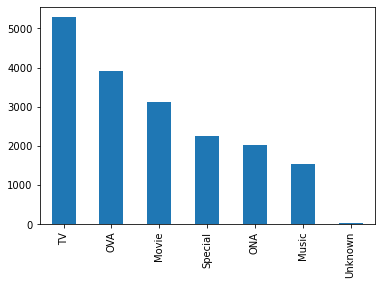

In [5]:
anime_df['type'].value_counts().plot.bar()

In [6]:
anime_df.loc[(anime_df['episodes']=="Unknown") & (anime_df['type'].isnull())].head()

,mal_id,title,synopsis,background,aired,airing,duration,episodes,type,favorites,...,score,scored_by,rating,premiered,genres,related,status,licensors,producers,studios


In [7]:
anime_df[anime_df['genres'].isnull()]

,mal_id,title,synopsis,background,aired,airing,duration,episodes,type,favorites,...,score,scored_by,rating,premiered,genres,related,status,licensors,producers,studios
9781,28487,Ikite Iru,Tsuyoshi is 9 years old and had friends over t...,-,1996,0,15 min,1,OVA,0,...,-1.00,-1,PG - Children,-,NaN,{},Finished Airing,-,-,-
9831,28653,Maze,Abstract stop motion animation by Tochka.,-,2012,0,2 min,1,Movie,1,...,5.60,109,G - All Ages,-,NaN,{},Finished Airing,-,-,-
9832,28655,PiKA PiKA,"Abstract short film, the first ""lightning dood...",-,2006,0,3 min,1,Movie,2,...,5.08,268,G - All Ages,-,NaN,{},Finished Airing,-,-,-
10083,29655,Chanda Gou,"Independent animation by Yanagihara Ryouhei, m...",-,1964,0,7 min,1,Movie,0,...,-1.00,-1,G - All Ages,-,NaN,{},Finished Airing,-,-,-
10138,29765,Metropolis (2009),Mirai Mizue's first time experimenting with ge...,-,2009,0,4 min,1,Movie,1,...,5.87,223,G - All Ages,-,NaN,{},Finished Airing,-,Mirai Film,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,44041,SD Gundam World Heroes,The balance of the worlds is maintained by her...,-,"Apr 8, 2021 to ?",1,24 min,-1,ONA,0,...,5.68,123,PG - Children,-,NaN,"{'Other': [{'mal_id': 38715, 'type': 'anime', ...",Currently Airing,-,-,Sunrise
17817,47426,23-ji no Saga Meshi Anime,A series of short animations to promote the fo...,-,"Feb 15, 2021 to Feb 25, 2021",0,19 sec per ep,10,ONA,0,...,-1.00,-1,G - All Ages,-,NaN,{},Finished Airing,-,-,-
17879,48171,Summer Ghost,-,-,2021,0,Unknown,1,Movie,2,...,-1.00,-1,None,-,NaN,"{'Other': [{'mal_id': 48177, 'type': 'anime', ...",Not yet aired,-,-,Flat Studio
18046,48644,Gyakuten Sekai no Denchi Shoujo,-,-,Not available,0,Unknown,-1,TV,1,...,-1.00,-1,None,-,NaN,{},Not yet aired,-,Egg Firm,Lerche


In [8]:
anime_df['genres'].fillna('Unknown', inplace=True)
anime_df.isnull().any()

mal_id        False
title         False
synopsis      False
background    False
aired         False
airing        False
duration      False
episodes      False
type          False
favorites     False
members       False
rank          False
popularity    False
score         False
scored_by     False
rating        False
premiered     False
genres        False
related       False
status        False
licensors     False
producers     False
studios       False
dtype: bool

In [9]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      18162 non-null  int64  
 1   title       18162 non-null  object 
 2   synopsis    18162 non-null  object 
 3   background  18162 non-null  object 
 4   aired       18162 non-null  object 
 5   airing      18162 non-null  int64  
 6   duration    18162 non-null  object 
 7   episodes    18162 non-null  int64  
 8   type        18162 non-null  object 
 9   favorites   18162 non-null  int64  
 10  members     18162 non-null  int64  
 11  rank        18162 non-null  float64
 12  popularity  18162 non-null  int64  
 13  score       18162 non-null  float64
 14  scored_by   18162 non-null  int64  
 15  rating      18162 non-null  object 
 16  premiered   18162 non-null  object 
 17  genres      18162 non-null  object 
 18  related     18162 non-null  object 
 19  status      18162 non-nul

In [10]:
anime_df = anime_df[['mal_id', 'title', 'synopsis', 'episodes', 'type', 'score', 'members', 'genres', 'related', 'studios', 'rank', 'popularity']]

In [11]:
anime_df.head()

,mal_id,title,synopsis,episodes,type,score,members,genres,related,studios,rank,popularity
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",26,TV,8.77,1366272,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Sunrise,32.0,44
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",1,Movie,8.39,291258,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",Bones,163.0,542
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",26,TV,8.23,591134,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Madhouse,285.0,213
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,26,TV,7.27,97700,"Action, Mystery, Police, Supernatural, Drama, ...",{},Sunrise,2508.0,1535
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,52,TV,6.97,13576,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",Toei Animation,3769.0,4514


In [12]:
anime_df.isnull().sum()

mal_id        0
title         0
synopsis      0
episodes      0
type          0
score         0
members       0
genres        0
related       0
studios       0
rank          0
popularity    0
dtype: int64

In [13]:
missing = anime_df.loc[(anime_df['episodes']== -1 & (anime_df['score']== -1))].head()
missing.shape

(5, 12)

In [14]:
missing.head(5)

,mal_id,title,synopsis,episodes,type,score,members,genres,related,studios,rank,popularity
1986,2173,Kouchuu Ouja Mushiking Super Battle Movie: Yam...,A shadow of Darkness approaches a peaceful For...,1,Movie,-1.0,451,"Adventure, Fantasy","{'Parent story': [{'mal_id': 4050, 'type': 'an...",-,15959.0,12779
2418,2636,"Dorami-chan: Wow, The Kid Gang of Bandits",No synopsis has been added for this series yet...,1,Movie,-1.0,350,Fantasy,{},-,14587.0,13470
2424,2642,Dorami-chan: A Blue Straw Hat,-,1,Movie,-1.0,295,"Kids, Fantasy",{},-,14586.0,14058
2471,2691,Gensei Shugoshin P-hyoro Ikka,"Based on Kaori Kimeki's fantasy manga in ""Prin...",1,Movie,-1.0,345,"Adventure, Fantasy","{'Sequel': [{'mal_id': 25363, 'type': 'anime',...",-,14864.0,13492
2491,2712,Shiratori Reiko de Gozaimasu!,"19-year old Reiko is a rich, arrogant, materia...",1,OVA,-1.0,413,"Comedy, Romance","{'Adaptation': [{'mal_id': 6990, 'type': 'mang...",Ajia-Do,12599.0,13012


In [15]:
anime_df = anime_df[anime_df.episodes != -1]
anime_df = anime_df[anime_df.score != -1]
anime_df = anime_df[anime_df.type != "Unknown"]


In [16]:
anime_df=anime_df.reset_index(drop=True)

In [17]:
anime_df.shape

(12791, 12)

In [18]:
anime_df.head()

,mal_id,title,synopsis,episodes,type,score,members,genres,related,studios,rank,popularity
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",26,TV,8.77,1366272,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Sunrise,32.0,44
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",1,Movie,8.39,291258,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",Bones,163.0,542
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",26,TV,8.23,591134,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Madhouse,285.0,213
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,26,TV,7.27,97700,"Action, Mystery, Police, Supernatural, Drama, ...",{},Sunrise,2508.0,1535
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,52,TV,6.97,13576,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",Toei Animation,3769.0,4514


In [19]:
m = anime_df.members.quantile(0.75)
C = anime_df.score.mean()
print(m, C)

27568.5 6.4837815651630235


In [20]:
def weighted_rating(anime_df, m, C):
    term = anime_df['members'] / (m + anime_df['members'])
    return anime_df['score'] * term + (1-term) * C

In [21]:
anime_df['community_rating'] = anime_df.apply(weighted_rating, axis=1, args=(m,C))
anime_df.head()

,mal_id,title,synopsis,episodes,type,score,members,genres,related,studios,rank,popularity,community_rating
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",26,TV,8.77,1366272,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",Sunrise,32.0,44,8.724781
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",1,Movie,8.39,291258,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",Bones,163.0,542,8.225172
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",26,TV,8.23,591134,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",Madhouse,285.0,213,8.152191
3,7,Witch Hunter Robin,Witches are individuals with special powers li...,26,TV,7.27,97700,"Action, Mystery, Police, Supernatural, Drama, ...",{},Sunrise,2508.0,1535,7.096973
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,52,TV,6.97,13576,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",Toei Animation,3769.0,4514,6.644214


In [22]:
anime_df.drop(['mal_id', 'members', 'episodes', 'score', 'rank','popularity','studios'], axis=1, inplace=True)
anime_df.head()

,title,synopsis,type,genres,related,community_rating
0,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",8.724781
1,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",Movie,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",8.225172
2,Trigun,"Vash the Stampede is the man with a $$60,000,0...",TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",8.152191
3,Witch Hunter Robin,Witches are individuals with special powers li...,TV,"Action, Mystery, Police, Supernatural, Drama, ...",{},7.096973
4,Bouken Ou Beet,It is the dark century and the people are suff...,TV,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",6.644214


In [23]:
anime_df = pd.concat([anime_df, anime_df['type'].str.get_dummies(), anime_df['genres'].str.get_dummies(sep=',')], axis=1)
anime_df.head()

,title,synopsis,type,genres,related,community_rating,Movie,Music,ONA,OVA,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Cowboy Bebop,"In the year 2071, humanity has colonized sever...",TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","{'Adaptation': [{'mal_id': 173, 'type': 'manga...",8.724781,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",Movie,"Action, Drama, Mystery, Sci-Fi, Space","{'Parent story': [{'mal_id': 1, 'type': 'anime...",8.225172,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Trigun,"Vash the Stampede is the man with a $$60,000,0...",TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","{'Adaptation': [{'mal_id': 703, 'type': 'manga...",8.152191,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Witch Hunter Robin,Witches are individuals with special powers li...,TV,"Action, Mystery, Police, Supernatural, Drama, ...",{},7.096973,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bouken Ou Beet,It is the dark century and the people are suff...,TV,"Adventure, Fantasy, Shounen, Supernatural","{'Adaptation': [{'mal_id': 1348, 'type': 'mang...",6.644214,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
anime_features = anime_df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)

In [26]:
cosine_sim

array([[1.        , 0.6172134 , 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [0.6172134 , 1.        , 0.46291005, ..., 0.        , 0.        ,
        0.        ],
       [0.85714286, 0.46291005, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.81649658],
       [0.        , 0.        , 0.        , ..., 0.        , 0.81649658,
        1.        ]])

In [27]:
cosine_sim.shape

(12791, 12791)

In [28]:
df_similarity = anime_df.corr(method='kendall')
#Store the data for later to be used in building the API
df_similarity.to_csv('movie_similarity.csv')
df_similarity.head()

,community_rating,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
community_rating,1.000000,0.036873,-0.077093,-0.095476,-0.144494,-0.016007,0.216530,0.078147,0.010854,0.141968,...,-0.010409,0.055248,-0.018932,0.005215,0.001828,-0.017122,-0.002237,-0.024130,0.000206,-0.020404
Movie,0.036873,1.000000,-0.114390,-0.141153,-0.246792,-0.178000,-0.293061,0.044015,-0.001885,-0.014815,...,-0.005534,-0.038479,-0.009426,0.001488,-0.004821,0.025494,-0.005534,0.073551,0.011361,0.007017
Music,-0.077093,-0.114390,1.000000,-0.082436,-0.144131,-0.103955,-0.171153,-0.082350,-0.004747,-0.115215,...,-0.003232,-0.051775,-0.003750,-0.023627,0.004315,-0.005030,-0.003232,-0.009703,-0.003232,-0.003959
ONA,-0.095476,-0.141153,-0.082436,1.000000,-0.177852,-0.128277,-0.211196,-0.025704,-0.005627,-0.048981,...,0.017610,0.053997,0.011133,-0.005324,0.010403,-0.001515,0.039209,0.002435,-0.003988,-0.004885
OVA,-0.144494,-0.246792,-0.144131,-0.177852,1.000000,-0.224279,-0.369255,-0.049254,-0.002797,-0.073124,...,-0.006973,-0.084477,0.005552,-0.024619,-0.009022,-0.015639,-0.006973,-0.020933,-0.006973,0.015464


In [29]:
anime_index = pd.Series(anime_df.index, index=anime_df.title).drop_duplicates()

In [30]:
anime_index.head()

title
Cowboy Bebop                       0
Cowboy Bebop: Tengoku no Tobira    1
Trigun                             2
Witch Hunter Robin                 3
Bouken Ou Beet                     4
dtype: int64

In [31]:
def get_recommendation(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result = anime_df[['title', 'genres', 'community_rating','synopsis', 'related']].iloc[anime_indices].drop(idx)
    return result

In [32]:
get_recommendation("Shingeki no Kyojin")

,title,genres,community_rating,synopsis,related
8105,Shingeki no Kyojin Season 2,"Action, Military, Mystery, Super Power, Drama,...",8.450871,"For centuries, humanity has been hunted by gia...","{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
10515,Shingeki no Kyojin Season 3,"Action, Military, Mystery, Super Power, Drama,...",8.591302,"Still threatened by the ""Titans"" that rob them...","{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
11557,Shingeki no Kyojin Season 3 Part 2,"Action, Drama, Fantasy, Military, Mystery, Sho...",9.058071,Seeking to restore humanity's diminishing hope...,"{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
12048,Shingeki no Kyojin: The Final Season,"Action, Military, Mystery, Super Power, Drama,...",8.930021,Gabii Braun and Falco Grice have been training...,"{'Adaptation': [{'mal_id': 23390, 'type': 'man..."
12550,Shingeki no Kyojin: Chronicle,"Action, Military, Mystery, Super Power, Drama,...",7.311441,The compilation film will recap the anime's 59...,"{'Full story': [{'mal_id': 16498, 'type': 'ani..."
11801,Katsute Kami Datta Kemono-tachi e,"Action, Drama, Fantasy, Military, Shounen",6.418289,With the initiation of the Patrian civil war c...,"{'Adaptation': [{'mal_id': 72117, 'type': 'man..."
1034,Kaze no Youjinbou,"Action, Mystery, Drama, Shounen",6.689407,"In search for Araki Genzo, George Kodama finds...",{}
110,GetBackers,"Action, Comedy, Drama, Mystery, Shounen, Super...",7.373136,Mido Ban and Amano Ginji are known as the Get ...,"{'Adaptation': [{'mal_id': 19, 'type': 'manga'..."
6581,Zetsuen no Tempest,"Action, Mystery, Psychological, Drama, Magic, ...",7.893121,"Yoshino Takigawa, an ordinary teenager, is sec...","{'Adaptation': [{'mal_id': 15205, 'type': 'man..."
114,Hunter x Hunter,"Action, Adventure, Super Power, Fantasy, Shounen",8.299342,Hunters are specialized in a wide variety of f...,"{'Adaptation': [{'mal_id': 26, 'type': 'manga'..."


In [33]:
get_recommendation("Kimi no Na wa.")

,title,genres,community_rating,synopsis,related
511,Wind: A Breath of Heart OVA,"Romance, Supernatural, School, Drama",6.460530,"Kazenone City, it is a city that made people f...","{'Adaptation': [{'mal_id': 21648, 'type': 'man..."
8993,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou ...,"Romance, School",7.145833,Love is blooming at Sakuragaoka High School. N...,"{'Adaptation': [{'mal_id': 86655, 'type': 'man..."
10283,Hakubo,"Romance, School",6.446079,Hakubo revolves around the daily life of Sachi...,{}
12408,Nakitai Watashi wa Neko wo Kaburu,"Comedy, Supernatural, Drama, Romance, School",7.255727,Miyo Sasaki is an energetic high school girl w...,"{'Adaptation': [{'mal_id': 134765, 'type': 'ma..."
175,Sen to Chihiro no Kamikakushi,"Adventure, Supernatural, Drama",8.764320,"Stubborn, spoiled, and naïve, 10-year-old Chih...",{}
689,School Days ONA,"Romance, School, Drama",6.179422,The story is about a love triangle between the...,"{'Alternative version': [{'mal_id': 2476, 'typ..."
937,Mizuiro (2003),"Romance, Supernatural, Drama",6.473583,Brother and younger sister-in-law live in the ...,"{'Adaptation': [{'mal_id': 72335, 'type': 'man..."
1467,To Heart 2 Special,"Romance, School, Drama",6.471117,Special recap episode #11.5.,"{'Parent story': [{'mal_id': 471, 'type': 'ani..."
5050,Gotou ni Naritai.,"Slice of Life, School, Drama",6.528161,Story of a girl born with a bad leg. Ritsuko l...,{}
6595,Aitsu to Lullaby: Suiyobi no Cinderella,"Romance, Drama, Shounen",6.472709,Based on a shounen manga by Kusunoki Michiharu...,"{'Adaptation': [{'mal_id': 28955, 'type': 'man..."


In [34]:
get_recommendation("Naruto")

,title,genres,community_rating,synopsis,related
1566,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia...",8.163351,It has been two and a half years since Naruto ...,"{'Adaptation': [{'mal_id': 11, 'type': 'manga'..."
732,Dragon Ball Z,"Action, Adventure, Comedy, Super Power, Martia...",8.103623,Five years after winning the World Martial Art...,"{'Adaptation': [{'mal_id': 42, 'type': 'manga'..."
4328,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.604488,"Five years after the events of Dragon Ball, ma...","{'Adaptation': [{'mal_id': 42, 'type': 'manga'..."
7727,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Super Power, Martia...",7.474059,Remastered version of the Majin Buu saga that ...,"{'Adaptation': [{'mal_id': 42, 'type': 'manga'..."
8842,Dragon Ball Super,"Action, Adventure, Comedy, Super Power, Martia...",7.360055,"Seven years after the events of Dragon Ball Z,...","{'Adaptation': [{'mal_id': 89734, 'type': 'man..."
212,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",7.066067,Most people think that ninjas are a thing of t...,"{'Adaptation': [{'mal_id': 136, 'type': 'manga..."
860,Virtua Fighter,"Action, Adventure, Martial Arts, Comedy, Shounen",6.627718,Akira Yuki has spent years honing his Bajiquan...,"{'Alternative version': [{'mal_id': 36937, 'ty..."
131,Shaman King,"Action, Adventure, Comedy, Super Power, Supern...",7.674380,A battle is about to begin in Tokyo: the Shama...,"{'Adaptation': [{'mal_id': 50, 'type': 'manga'..."
243,Bleach,"Action, Adventure, Comedy, Super Power, Supern...",7.774569,Ichigo Kurosaki is an ordinary high schooler—u...,"{'Adaptation': [{'mal_id': 12, 'type': 'manga'..."
1336,D.Gray-man,"Action, Adventure, Comedy, Super Power, Demons...",7.970829,Losing a loved one is so painful that one may ...,"{'Adaptation': [{'mal_id': 24, 'type': 'manga'..."


In [35]:
anime_df.to_csv('df_anime.csv')

